dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
MinMax 0.0 16.0
(1797, 64) (1797,)


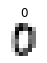

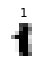

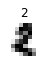

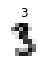

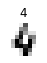

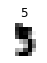

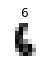

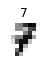

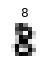

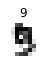

In [ ]:
# 這邊是 64 = 8*8
# mnist 是 784 = 28 * 28 
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
print(digits.keys())
X, y = digits['data'], digits['target']
print('MinMax', min(X.flatten()), max(X.flatten()))
print(X.shape, y.shape)
# ---- display digit ----- ##
for i in range(10):
    plt.figure(figsize=(0.6, 0.6))
    plt.title(y[i])
    plt.imshow( X[i].reshape(8, 8), cmap='gray_r' )
    plt.axis('off')
    plt.show()
#---------------------------#

In [ ]:
# 導入函式庫
import numpy as np  
import keras

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime
from  sklearn.model_selection import train_test_split
start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，自動分訓練集及測試集
#(X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
# (X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train, X_test, y_train, y_test = train_test_split(X.reshape(1797, 8, 8), y, test_size=0.2, random_state=42)
# 使用sklearn train test split分出訓練集測試集   
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((1437, 8, 8), (1437,)), ((360, 8, 8), (360,)))

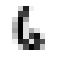

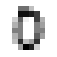

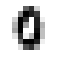

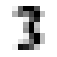

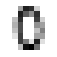

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(5):    
    plt.figure(figsize=(0.8 , 0.8))
    plt.imshow(X_train[i], cmap='gray_r')
    plt.axis('off')
    plt.show()

In [ ]:
# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256 個輸出變數
model.add(Dense(units=64, input_dim=64, kernel_initializer='normal', activation='relu')) 

model.add(Dense(units=48, kernel_initializer='normal', activation='relu')) 

model.add(Dense(units=32, kernel_initializer='normal', activation='relu')) 

# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 48)                3120      
                                                                 
 dense_10 (Dense)            (None, 32)                1568      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 9,178
Trainable params: 9,178
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_test[:3],\
np_utils.to_categorical(y_test)[:3]

(array([6, 9, 3]), array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(1437, 8*8).astype('float32')  
X_test_2D = X_test.reshape(360, 8*8).astype('float32')    

x_Train_norm = X_train_2D/16  # 標準化就是0-1之間數字 
x_Test_norm = X_test_2D/16   

# 進行訓練, 訓練過程會存在 train_history 變數中 callback
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=8, 
                          verbose=1
                          )  


Epoch 1/10
144/144 [==============================] - 1s 4ms/step - loss: 2.0173 - accuracy: 0.3368 - val_loss: 1.1679 - val_accuracy: 0.6181
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.8114 - accuracy: 0.7267 - val_loss: 0.6649 - val_accuracy: 0.7708
Epoch 3/10
144/144 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7903 - val_loss: 0.5746 - val_accuracy: 0.8021
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.8329 - val_loss: 0.4994 - val_accuracy: 0.7917
Epoch 5/10
144/144 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8573 - val_loss: 0.4882 - val_accuracy: 0.8229
Epoch 6/10
144/144 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8790 - val_loss: 0.4488 - val_accuracy: 0.8507
Epoch 7/10
144/144 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.9034 - val_loss: 0.3415 - val_accuracy: 0.8889
Epoch 

In [ ]:
train_history.history.keys() # callback

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

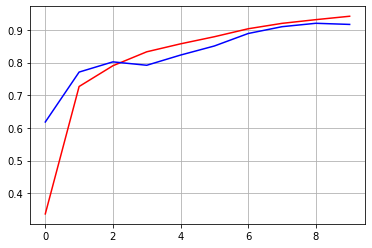

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

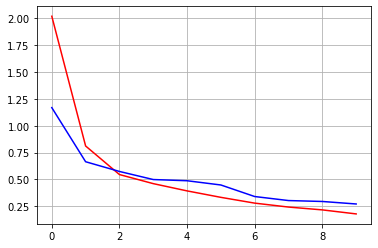

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


12/12 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9111
	[Info] Accuracy of testing data = 91.1%
45/45 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9415
	[Info] Accuracy of training data = 94.2%


In [ ]:
# 預測(prediction)
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis=1) # np.argmax 找出最佳的數字softmax
model.predict(X)[:3]

12/12 [==============================] - 0s 2ms/step


array([[1.0782886e-04, 2.4193081e-03, 7.0421589e-07, 3.7248380e-09,
        1.7508595e-03, 8.4006714e-08, 9.8646885e-01, 3.4427508e-09,
        9.2490315e-03, 3.1946990e-06],
       [1.6633106e-05, 1.8174447e-08, 2.2096297e-10, 6.5843994e-04,
        5.4749240e-08, 5.3484839e-01, 5.2603642e-12, 9.5127725e-06,
        5.3742604e-04, 4.6392959e-01],
       [4.2658321e-11, 8.8409752e-07, 1.9118786e-03, 9.9646747e-01,
        6.9192474e-10, 2.2481795e-04, 3.5519237e-12, 4.6860864e-06,
        4.7015751e-04, 9.2010899e-04]], dtype=float32)

In [ ]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [6 5 3 7 2 1 5 2 5 3 2 4 4 0 4 2 3 7 8 8]
actual    : [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8]


In [ ]:
# # 模型結構存檔
# from keras.models import model_from_json
# json_string = model.to_json()
# with open("model.config", "w") as text_file:
#     text_file.write(json_string)

    
# # 模型訓練結果存檔
# model.save_weights("model.weight")

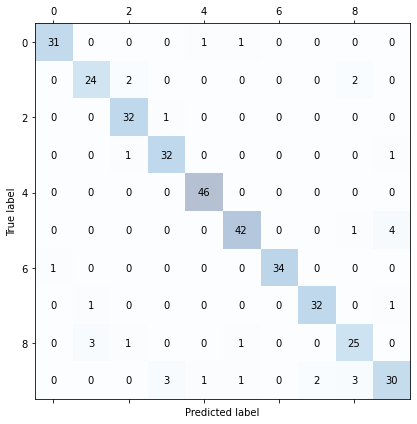

In [ ]:
# 繪製
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()